# Mental Crisis Around the World


**Introduction:**

Mental health is a complex issue since it affects individuals and their families. A country's suicide rates indicate if a country is going through a mental health crisis, serve as a public health indicator, and overlook the overal social well-being. Rates can help prevent suicides and raise awareness. Based on Google, males tend to commit more suicides than females, but is it exactly true? We found a data source created by Omkar Gowda. The dataset shows suicide rates in every country that has them available from 1985 to 2021. The data helps look at whether suicide rates increased or decreased over these 36 years. Additionally, the data includes the gender of individuals, the country's GDP and other key socioeconomic indicators like the Human Development Index. We picked out this data set and analysis idea to help understand where  suicide rates are higher, where they are lower, if suicides are more of a gender issue, and the socioeconomic factors behind it. Countries with a higher HDI index and GDP usually have better mental health awareness, therapists, and tools like suicide hotlines. This analysis is designed to test whether this is true, whether it's a regional or a global issue, and whether males or both genders need more attention when it comes to prevention of suicides.

**All Variables Included:** the dataset consists of suicide numbers, years, countries, GDP, HDI, sex, age, suicides per 100,000 population, GDP per capita and generations

**Dependant Variable:** the dependant variable in our analysis is the number of suicides. We will be comparing the number of suicides to factors like GDP, HDI, sex, countries, GDP per capita and generations. We will also be using suicides per 100,000 for some instances.

**Main Purpose:** the main purpose of our analysis is to understand why and where suicides occur and which genders can be more prone to suicide. Our analysis can be used to help understand how suicide rates can be lowered

In [7]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import statsmodels.stats.weightstats as smw
import statsmodels.stats.proportion as smp
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pylab


import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

import seaborn as sns

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv('/content/drive/MyDrive/ Portfolio/2. Data_Analytics/master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers


In [10]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,31756.000000,30556.000000,3.175600e+04,31756.000000,12300.000000,31756.000000
mean,2003.395390,237.136242,7.217454e+06,11.716668,0.793666,17588.954606
std,9.760604,867.956107,5.799323e+07,21.590926,0.097480,19464.861140
min,1985.000000,0.000000,2.780000e+02,0.000000,0.377790,251.000000
25%,1996.000000,3.000000,1.288210e+05,0.370000,0.727000,3765.000000
50%,2004.000000,25.000000,5.468325e+05,4.285000,0.800457,10062.000000
75%,2011.000000,132.000000,2.908763e+06,14.560000,0.874000,25622.000000
max,2020.000000,22338.000000,1.411100e+09,515.092734,0.975114,126352.000000


# Gender Analysis

**Do males commit more suicides than the rest of the population?**

We want to test the following:

$$
\begin{cases}
H_0: & \mu_{\text{Males}} \leq \mu_{\text{Females}} \\
H_a: & \mu_{\text{Males}} > \mu_{\text{Females}}
\end{cases}
$$

**H0:** Males commit less or same number of suicides than females

**Ha:** Males commit more suicides than females


In [11]:
df["sex"].describe()

,sex
count,31756
unique,2
top,male
freq,15878


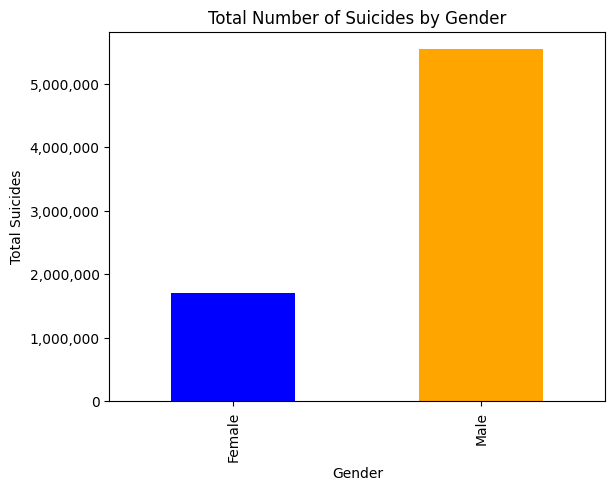

In [12]:
# Group by sex and sum the suicides
total_suicides_by_gender = df.groupby('sex')['suicides_no'].sum()

# Plotting the total number of suicides by gender
fig, ax = plt.subplots()
total_suicides_by_gender.plot(kind='bar', color=['blue', 'orange'], ax=ax)
plt.title('Total Number of Suicides by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Suicides')


ax.set_xticks(range(len(total_suicides_by_gender)))
ax.set_xticklabels(['Female', 'Male'])

# Format the Y-axis to show the numbers as integers (millions)
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()


The bar graph suggests a high correlation between the number of suicides and males and females. According to it, the number of female suicides is higher, but further analysis is required to determine if it's a causal relationship.

In [13]:
# Filter data for males and females
df_male = df[df['sex'] == 'male']['suicides/100k pop']
df_female = df[df['sex'] == 'female']['suicides/100k pop']

ds_male = smw.DescrStatsW(df_male)
ds_female = smw.DescrStatsW(df_female)

res = smw.CompareMeans(ds_male, ds_female)
lower, upper = res.tconfint_diff(alpha=0.05, usevar='unequal')

# Get t-statistic and p-value for a one-tailed test
tStat, pVal, dfreedom = res.ttest_ind(alternative='larger', value=0, usevar='unequal')


print(f"95% confidence interval for the difference in means: ({lower}, {upper})")
print(f"t-statistic: {tStat}")
print(f"p-value: {pVal}")

# Interpret the p-value
alpha = 0.05
if pVal < alpha:
    print("Reject the null hypothesis: The mean suicide rate for males is significantly greater than that for females.")
else:
    print("Fail to reject the null hypothesis: There is no significant evidence to say that the mean suicide rate for males is greater than that for females.")


95% confidence interval for the difference in means: (12.90482177485509, 13.808180074900548)
t-statistic: 57.96089966254939
p-value: 0.0
Reject the null hypothesis: The mean suicide rate for males is significantly greater than that for females.


According to this analysis, we reject the null hypothesis, therefore males commit more suicides than the rest of the population. The pVal is either 0% or very close to 0%. The tStat corroborates the low Pval.

# Year Analysis

**Did suicides grow or not?**

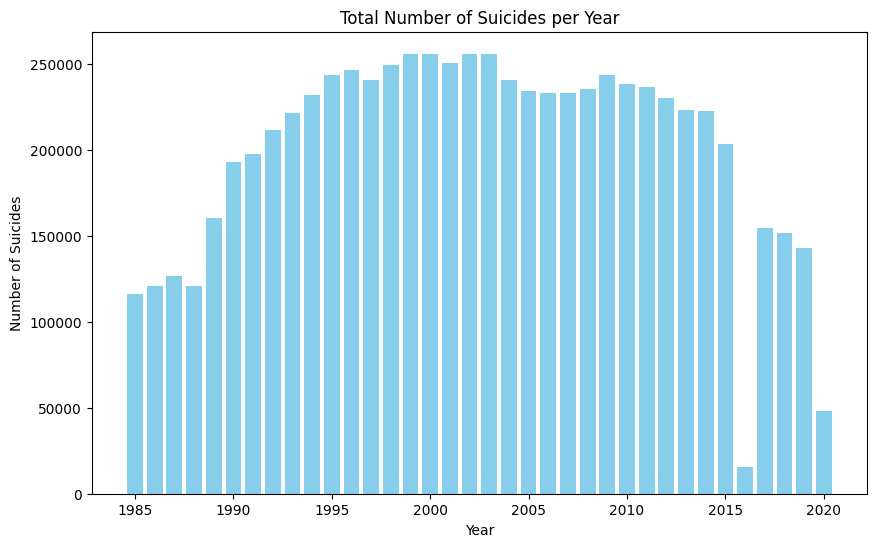

In [14]:
suicides_by_year = df.groupby('year')['suicides_no'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(suicides_by_year['year'], suicides_by_year['suicides_no'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.title('Total Number of Suicides per Year')
plt.show()

This graph shows some volatility across the years, with no consistent trend. It shows some peaks and troughs, which might be due to specific events during the specific year.

Worth noting is the relatively low count for year 2016 compared to the remaining years. This may have been thanks to more effective interventions, socioeconomic improvements or it might just be a statistical anomaly, an outlier.

# Country Analysis

**Which countries had the highest rates in the past 10 years?**

In [15]:
Country =  df['country']

In [16]:
Country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [17]:
print('The countries that had the highest suicides/100k pop in the last 10 years:')

# Check the most recent year in your data to calculate the last 10 years (2021-2011)
latest_year = df['year'].max()
start_year = latest_year - 9

# Filter the data for the last 10 years
ten_years_data = df[(df['year'] >= start_year) & (df['year'] <= latest_year)]

# Group the data by country and calculate the mean suicide rate for the last 10 years
average_suicide_rate = ten_years_data.groupby('country')['suicides/100k pop'].mean()

# Sort the data to find the countries with the highest average suicide rates
sorted_countries = average_suicide_rate.sort_values(ascending=False)

# Display the top 10 entries
print(sorted_countries.head(10));

The countries that had the highest suicides/100k pop in the last 10 years:
country
Republic of Korea      111.817168
Slovakia                38.304592
Suriname                30.240833
Guyana                  29.830278
Lithuania               20.941319
Republic of Moldova     19.347159
Mongolia                18.439000
France                  16.292708
Czech Republic          15.378000
Hungary                 14.105223
Name: suicides/100k pop, dtype: float64


There is a mixture of countries with different economical situations. Developed countries like South Korea, Cech Republic are on the list of countries with the highest suicides per 100,000 population. Then, you also have third world coutnries like Guyana and Mongolia on the list, indicating that more prosperous countries do not necessarily have lower suicide rates.

# GDP Analysis

### What generation has the most suicide rates?

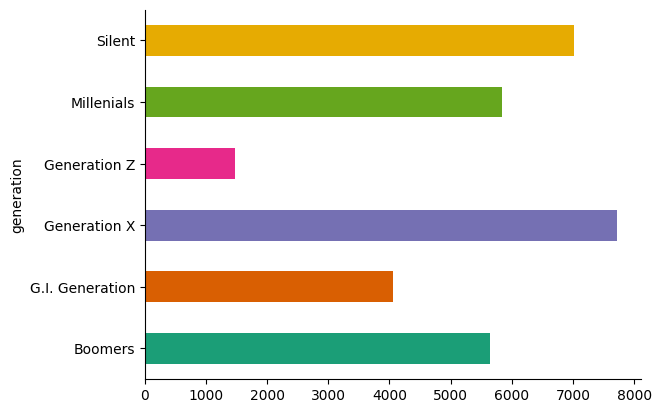

In [18]:
#Creating bar graph
df.groupby('generation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


Surprisingly to us, Generation X has significantly higher rates than Gen-Z. Upon further investigation, higher suicide rates among Generation X compared to Generation Z can be attributed to several factors. Gen X has faced significant economic pressures, including job market instability and high debt burdens, exacerbating financial stress. Additionally, this generation grew up in an era where mental health issues were more stigmatized, leading to untreated conditions, and had fewer mental health resources. Socially, many experienced high divorce rates during their formative years and now face the stress of being the "sandwich generation," caring for both aging parents and children. Technologically, they may experience more social isolation due to less digital connectivity. In contrast, Gen Z benefits from greater mental health awareness, more resources, and robust online support systems, helping mitigate feelings of isolation and despair. However, it is important to mention that greater exposure to technology and the exessive social media consumption by gen z may lead to worsening mental health crisis rates in the future, increasing the rate of suicide. Time will tell how this changes in the long run.

###Is it true that suicide rates before 2000 are greater than after 2000?

In [19]:
# Create a new column indicating whether the year is before or after 2000
df['period'] = df['year'].apply(lambda x: 'before_2000' if x < 2000 else 'after_2000')

# Filter data for before and after 2000
before_2000_suicides = df[df['period'] == 'before_2000']['suicides/100k pop'].dropna()
after_2000_suicides = df[df['period'] == 'after_2000']['suicides/100k pop'].dropna()

# Perform one-tailed t-test
# Null hypothesis: Suicide rates before 2000 <= Suicide rates after 2000
# Alternative hypothesis: Suicide rates before 2000 > Suicide rates after 2000

# Calculate the t-statistic and p-value
test_result = smw.ttest_ind(before_2000_suicides, after_2000_suicides, alternative='larger')

t_statistic = test_result[0]
p_value = test_result[1]

# Print the results
print(f'T-statistic: {t_statistic}, P-value: {p_value}')

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There are more suicides after the year 2000.")
else:
    print("Fail to reject the null hypothesis: There are not more suicides after the year 2000.")

T-statistic: 13.069826132210501, P-value: 3.087036513690351e-39
Reject the null hypothesis: There are more suicides after the year 2000.



Essentially, the test concludes that there are actually suicides after 2000. Economic instability, marked by events like the dot-com bubble burst and rising income inequality, has led to significant financial stress and uncertainty. Social dynamics have also shifted, with increasing rates of family fragmentation and social isolation. Additionally, the rise of digital technology and social media, while connecting people, has also contributed to cyberbullying, increased anxiety, and feelings of inadequacy. The opioid crisis has also further exacerbated mental health issues. Despite greater awareness and resources for mental health, these stressors have collectively contributed to a rise in suicide rates post-2000.

###Do countries with higher GDP have more suicides?


In [20]:
# Split the data into two groups based on GDP per capita: high GDP and low GDP
median_gdp = df['gdp_per_capita ($)'].median()
high_gdp_suicides = df[df['gdp_per_capita ($)'] > median_gdp]['suicides/100k pop'].dropna()
low_gdp_suicides = df[df['gdp_per_capita ($)'] <= median_gdp]['suicides/100k pop'].dropna()

# Perform one-tailed t-test
# Null hypothesis: Suicide rates in high GDP countries <= Suicide rates in low GDP countries
# Alternative hypothesis: Suicide rates in high GDP countries > Suicide rates in low GDP countries

# Calculate the t-statistic and p-value
test_result_gdp = smw.ttest_ind(high_gdp_suicides, low_gdp_suicides, alternative='larger')

t_statistic_gdp = test_result_gdp[0]
p_value_gdp = test_result_gdp[1]

# Print the results
print(f'T-statistic: {t_statistic_gdp}, P-value: {p_value_gdp}')

# Conclusion
alpha = 0.05
if p_value_gdp < alpha:
    print("Reject the null hypothesis: There are more suicides in countries with higher GDP.")
else:
    print("Fail to reject the null hypothesis: There are not more suicides in countries with higher GDP.")

T-statistic: 4.01028907369872, P-value: 3.0391550388409776e-05
Reject the null hypothesis: There are more suicides in countries with higher GDP.


Higher suicide rates in countries with higher GDP can be as a result of a variety of different issues. Economic prosperity often comes with increased pressure to succeed, leading to high levels of stress, anxiety, and burnout. Wealthier societies may also experience greater social isolation as individuals prioritize careers over community and family connections. The competitive environment in high-GDP countries can exacerbate feelings of inadequacy and failure. Additionally, higher expectations for personal and professional achievements can lead to significant mental health struggles. Despite better access to mental health resources, the stigma around mental health issues may still prevent individuals from seeking help, contributing to higher suicide rates. Look at South Korea for example, having an extremely high GDP, a massive economy with a very hardworking population. Despite the opportunities for careers there and the positive economic state of the country, people are overworked and are driven to kill themselves under the immense pressure from their jobs and lack of a social life due to the amount of hours they work.

###Is there a correlation between GDP and numbers of Suicides ?

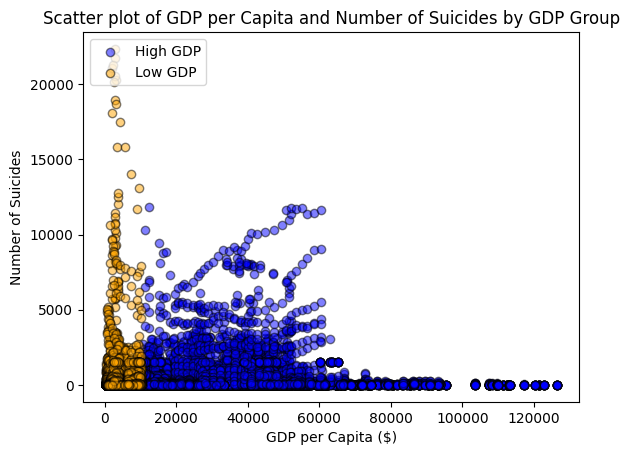

In [21]:
gdp_threshold = df['gdp_per_capita ($)'].median()

# Separate the data into high GDP and low GDP
high_GDP = df[df['gdp_per_capita ($)'] > gdp_threshold]
low_GDP = df[df['gdp_per_capita ($)'] <= gdp_threshold]

# Create scatter plot with GDP on the x-axis and suicides on the y-axis, separated by high and low GDP groups
plt.scatter(high_GDP['gdp_per_capita ($)'], high_GDP['suicides_no'], alpha=0.5, color='blue', edgecolors='black', label='High GDP')
plt.scatter(low_GDP['gdp_per_capita ($)'], low_GDP['suicides_no'], alpha=0.5, color='orange', edgecolors='black', label='Low GDP')

plt.xlabel('GDP per Capita ($)')
plt.ylabel('Number of Suicides')
plt.title('Scatter plot of GDP per Capita and Number of Suicides by GDP Group')
plt.legend(loc='upper left')
plt.show()

The scatter plot above depicts the number of suicides and correlates it with the GDP per capita across all the countries. The scatter plot indicates that there is somewhat of a correlation between the two variables. While there are notably a number of outliers, the general trend shows a large cluster of the lower GDP per capita countries clustering together having a lower number of suicide numbers. The countries of high gdp generally show a higher trend of suicide numbers, clustering closer to 50000. The points shown to the bottom right of the plot, are few and are approximately zero. This is due to the very small amount of countries having a higher gdp per capita above 65000, thus bringing the attention to the majority of high gdp per capita countries being around 25000. Overall it can be determined that while there is somewhat of a correlation in the scatter plot, the correlation itself still resides with what the hypothesis tests have concluded: That there tends to be higher number of suicides in countries with higher GDP.

### Do suicide numbers differ according to GDP of the countries  ?

In [22]:
mean_gdp = df['gdp_per_capita ($)'].mean()
print(f"Mean GDP per capita: {mean_gdp}")


threshold = 17589
df['High'] = np.where(df['gdp_per_capita ($)'] > threshold, 1, 0)


model = ols('suicides_no ~ C(High)', data=df).fit()


table = sm.stats.anova_lm(model)
print(table)

Mean GDP per capita: 17588.95460570971
               df        sum_sq       mean_sq           F        PR(>F)
C(High)       1.0  1.717578e+08  1.717578e+08  229.699167  1.069367e-51
Residual  30554.0  2.284678e+10  7.477510e+05         NaN           NaN


###Do countries with a HDI Index have lower suicide rates?

In [23]:
# Redefine the categorize_hdi function since it's missing from the current code context
def categorize_hdi(hdi):
    if pd.isna(hdi):
        return 'Unknown'
    elif hdi < 0.55:
        return 'Low'
    elif hdi < 0.70:
        return 'Medium'
    elif hdi < 0.80:
        return 'High'
    else:
        return 'Very High'

# Create HDI categories
df['hdi_category'] = df['HDI for year'].apply(categorize_hdi)

# Split the data into two groups based on HDI category: high HDI (High and Very High) and low HDI (Low and Medium)
high_edu_suicides = df[df['hdi_category'].isin(['High', 'Very High'])]['suicides/100k pop'].dropna()
low_edu_suicides = df[df['hdi_category'].isin(['Low', 'Medium'])]['suicides/100k pop'].dropna()

# Perform one-tailed t-test
# Null hypothesis: Suicide rates in high HDI countries >= Suicide rates in low HDI countries
# Alternative hypothesis: Suicide rates in HDI countries < Suicide rates in low HDI countries

# Calculate the t-statistic and p-value
test_result_edu = smw.ttest_ind(high_edu_suicides, low_edu_suicides, alternative='smaller')

t_statistic_edu = test_result_edu[0]
p_value_edu = test_result_edu[1]

# Print the results
print(f'T-statistic: {t_statistic_edu}, P-value: {p_value_edu}')

# Conclusion
alpha = 0.05
if p_value_edu < alpha:
    print("Reject the null hypothesis: Countries with higher HDI levels have lower suicide rates.")
else:
    print("Fail to reject the null hypothesis: Countries with higher HDI levels do not have lower suicide rates.")


T-statistic: 2.439850165824071, P-value: 0.992646308565756
Fail to reject the null hypothesis: Countries with higher HDI levels do not have lower suicide rates.


As do countries with high GDP, countries with higher Human Development Index (HDI) scores also tend to have higher suicide rates. Higher HDI is associated with increased individualism, urbanization, and economic pressures, which can lead to social isolation and heightened stress. For instance, studies have found significant correlations between higher HDI and increased suicide rates due to these socio-economic stressors and the breakdown of traditional social structures. Additionally, the pressures and expectations associated with high levels of education and economic development can contribute to mental health issues such as depression, which is a major risk factor for suicide. The complexity of this relationship underscores the need for comprehensive mental health strategies in high HDI countries to address these contributing factors.

###Is it true that suicide rates vary during economic crisis?

In [24]:
# Define function to categorize years into periods of economic crisis and non-crisis
def categorize_year(year):
    return 'crisis' if year in [1998, 2008, 2009] else 'non_crisis'

df['economic_period'] = df['year'].apply(categorize_year)

# Separate the data into two groups
crisis_data = df[df['economic_period'] == 'crisis']['suicides/100k pop']
non_crisis_data = df[df['economic_period'] == 'non_crisis']['suicides/100k pop']

ds1 = smw.DescrStatsW(crisis_data)
ds2 = smw.DescrStatsW(non_crisis_data)
res = smw.CompareMeans(ds1, ds2)
tStat, pVal, dfreedom = res.ttest_ind(alternative='two-sided', value=0, usevar='unequal')
print(f'T-statistic: {tStat}, P-value: {pVal}')
# Set significance level
alpha = 0.05

# Draw conclusion
if p_value < alpha:
    print("Reject the null hypothesis: Suicide rates differ significantly during economic crisis years compared to non-crisis years.")
else:
    print("Fail to reject the null hypothesis: Suicide rates do not differ significantly during economic crisis years compared to non-crisis years.")


T-statistic: 2.904345904828606, P-value: 0.003700563456136927
Reject the null hypothesis: Suicide rates differ significantly during economic crisis years compared to non-crisis years.


We can observe that the test concludes how there is indeed a difference in suicide rates during the economic crisis years compared to non crisis years. This is an obvious conclusion regardless since we know that during years of economic crisis, general conditions in the lives of people deteriorate.

###A graphical depiction of suicide rates in countries in crisis and non-crisis years

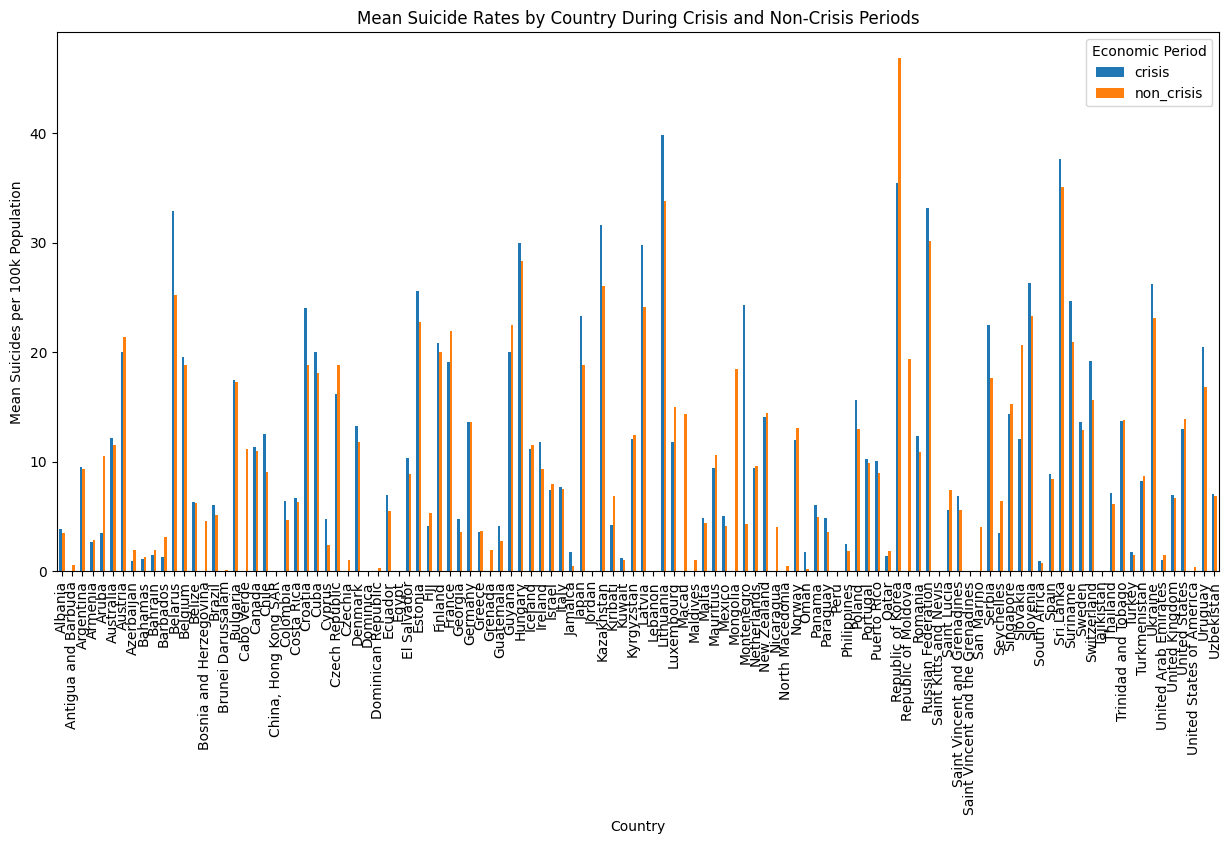

In [25]:
# Group by country and economic period, then calculate mean suicide rates
country_crisis_suicides = df.groupby(['country', 'economic_period'])['suicides/100k pop'].mean().unstack()

# Plotting the differences
country_crisis_suicides.plot(kind='bar', figsize=(15, 7))
plt.title('Mean Suicide Rates by Country During Crisis and Non-Crisis Periods')
plt.xlabel('Country')
plt.ylabel('Mean Suicides per 100k Population')
plt.legend(title='Economic Period')
plt.show()

Generally speaking, besides a few outliers like the Republic of Korea, there tends to be a correlation between an economic crisis and higher suicide rates.

#HDI for year compared to number of suicides

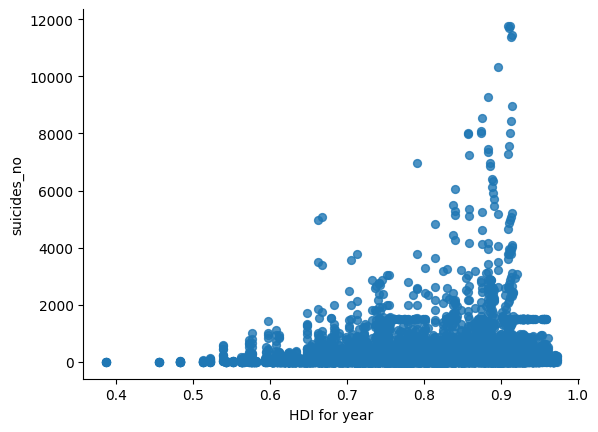

In [26]:
#Yearly HDI Compared to Number of Suicides

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='HDI for year', y='suicides_no', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

 The scatter plot graph demostrate that countries with higher HDI have the more suicides than in countries with lower HDI. Although, to ensure this is correct , the hypothsis testing will be done.

In [27]:
df_filtered = df[['HDI for year', 'suicides/100k pop']].dropna()
df_filtered['HDI for year'] = pd.to_numeric(df_filtered['HDI for year'])
df_filtered['suicides/100k pop'] = pd.to_numeric(df_filtered['suicides/100k pop'])


median_HDI = df_filtered['HDI for year'].median()
print(f"Median HDI: {median_HDI}")

# Create high and low HDI groups
df_filtered['high_HDI'] = df_filtered['HDI for year'] > median_HDI

# Separate the data by HDI group
high_HDI_suicides = df_filtered[df_filtered['high_HDI'] == True]['suicides/100k pop']
low_HDI_suicides = df_filtered[df_filtered['high_HDI'] == False]['suicides/100k pop']


ds1 = smw.DescrStatsW(high_HDI_suicides)
ds2 = smw.DescrStatsW(low_HDI_suicides)


res = smw.CompareMeans(ds1, ds2)

# Perform a t-test
tStat, pVal, dfreedom = res.ttest_ind(alternative='two-sided', value=0, usevar='unequal')
print(f'T-statistic: {tStat}, P-value: {pVal}')


alpha = 0.05
if pVal < alpha:
    print("Reject the null hypothesis: Countries with higher HDI have the more suicides than in countries with lower HDI.")
else:
    print("Fail to reject the null hypothesis:Countries with higher HDI have the less or same suicides than in countries with lower HDI..")

Median HDI: 0.800456703
T-statistic: 3.442122793497223, P-value: 0.0005796036984661108
Reject the null hypothesis: Countries with higher HDI have the more suicides than in countries with lower HDI.


We can conclude that countries with higher HDI have more suicides than in countries with lower HDI

We want to test the following:

$$
\begin{cases}
H_0 : & \mu_{\text{High GDP}} = \mu_{\text{Low GDP}} \\
H_a : & \mu_{\text{High GDP}} \neq \mu_{\text{Low GDP}}
\end{cases}
$$


Is there a significant difference in suicide rates between coutries with high GDP and low GDP?

**Null Hypothesis (H0):** There is no significant difference in the suicide rates per 100k population between countries with high GDP per capita and low GDP per capita.

**Alternative Hypothesis (H1):** There is a significant difference in the suicide rates per 100k population between countries with high GDP per capita and low GDP per capita.

In [28]:
df_filtered = df[['gdp_per_capita ($)', 'suicides/100k pop']].dropna()

# Define high GDP per capita as greater than the median GDP per capita, to after separate between high and low
median_GDP = df_filtered['gdp_per_capita ($)'].median()
print(f"Median GDP per Capita: {median_GDP}")

df_filtered['high_GDP'] = df_filtered['gdp_per_capita ($)'] > median_GDP

# Separate the data by GDP per capita group
high_GDP_suicides = df_filtered[df_filtered['high_GDP'] == True]['suicides/100k pop']
low_GDP_suicides = df_filtered[df_filtered['high_GDP'] == False]['suicides/100k pop']


ds1 = smw.DescrStatsW(high_GDP_suicides)
ds2 = smw.DescrStatsW(low_GDP_suicides)


res = smw.CompareMeans(ds1, ds2)


tStat, pVal, dfreedom = res.ttest_ind(alternative='two-sided', value=0, usevar='unequal')

print(f'T-statistic: {tStat}, P-value: {pVal}')


alpha = 0.05
if pVal < alpha:
    print("Reject the null hypothesis: There is a significant difference in suicide rates between high GDP per capita and low GDP per capita countries.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in suicide rates between high GDP per capita and low GDP per capita countries.")


Median GDP per Capita: 10062.0
T-statistic: 4.0101924547008085, P-value: 6.0813057917082096e-05
Reject the null hypothesis: There is a significant difference in suicide rates between high GDP per capita and low GDP per capita countries.


In [29]:
df_filtered = df[['gdp_per_capita ($)', 'suicides/100k pop']].dropna()

# Define high GDP per capita as greater than the median GDP per capita, to after separate between high and low
median_GDP = df_filtered['gdp_per_capita ($)'].median()
print(f"Median GDP per Capita: {median_GDP}")

df_filtered['high_GDP'] = df_filtered['gdp_per_capita ($)'] > median_GDP

# Separate the data by GDP per capita group
high_GDP_suicides = df_filtered[df_filtered['high_GDP'] == True]['suicides/100k pop']
low_GDP_suicides = df_filtered[df_filtered['high_GDP'] == False]['suicides/100k pop']


ds1 = smw.DescrStatsW(high_GDP_suicides)
ds2 = smw.DescrStatsW(low_GDP_suicides)


res = smw.CompareMeans(ds1, ds2)


tStat, pVal, dfreedom = res.ttest_ind(alternative='larger', value=0, usevar='unequal')

print(f'T-statistic: {tStat}, P-value: {pVal}')


alpha = 0.05
if pVal < alpha:
    print("Reject the null hypothesis: There is more suicide rates between high GDP per capita and low GDP per capita countries.")
else:
    print("Fail to reject the null hypothesis: There is less suicide rates between high GDP per capita and low GDP per capita countries.")


Median GDP per Capita: 10062.0
T-statistic: 4.0101924547008085, P-value: 3.0406528958541048e-05
Reject the null hypothesis: There is more suicide rates between high GDP per capita and low GDP per capita countries.


Therefore we can conclude there is a significant difference in suicide rates
between high GDP per capita and low GDP per capita countries.

After conducting a thorough statistical analysis of suicide rates across all countries, comparing multiple variables and factors to understand their correlations, several key takeaways emerged. First, suicide rates have not shown a consistent upward trend in recent years; rather, they have experienced fluctuations with drops and rises depending on each year. A significant difference in suicide rates was observed between countries with high GDP per capita and those with low GDP per capita. Interestingly, countries with higher Human Development Index (HDI) scores do not necessarily have lower suicide rates.

The analysis highlighted that the countries suffering the most from suicides per 100,000 population are South Korea, Slovakia, and Suriname. It was also found that Generation X has committed the most suicides from 1985 to 2021. Additionally, suicide rates differ significantly between crisis and non-crisis years, underscoring the impact of socio-economic and political stability on mental health. For both males and females have high numbers of suicides but the male suicide numbers are several times higher.

The primary goal of this analysis was not to provide a remedy to the severe and ongoing issue of suicides but to demonstrate how various factors may influence suicide rates. Due to the gravity of the topic, it was decided to exclude any images from this analysis.

It is important to mention that the findings from this analysis underscore the gravity and complexity of the suicide epidemic, revealing that it affects countries regardless of their economic status and development level. The high suicide rates in countries like South Korea, Slovakia, and Suriname, along with the significant numbers in both males and females, highlight the pervasive nature of this crisis. These insights emphasize the urgent need for comprehensive action to address the myriad factors contributing to suicides, including economic, social, and mental health aspects. It is imperative for governments, healthcare providers, and communities to implement effective prevention strategies, support systems, and policies to mitigate this devastating issue and save lives.


